## 💻 UnpackAI DL201 Bootcamp - Week 2 - Skills: Preprocessing Tabular Data

### 📕 Learning Objectives

* Have an appreciation for the challenge of preprocessing tabular data, and have confidence in tools to handle it.
* Gain awareness of a framework of feature engineering
* Understand how data wrangling can be carried out 

### 📖 Concepts map

* Indexing & Broadcasting
* Quantitative vs. Qualitative Data
* Feature Extraction




In [1]:
!pip install openpyxl
!git clone https://github.com/unpackAI/DL201.git


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re 

# Imports 
from pathlib import Path

#Kaggle config
DATA_DIR = Path('/kaggle/working/DL201/data') #uncomment for kaggle
IMAGE_DIR = Path('/kaggle/working/DL201/img') #Uncomment for Kaggle


# Local Config
#DATA_DIR = Path.home()/'Datasets'/'unpackAI'/'DL201'/'data'
#IMAGE_DIR = Path('../img') #uncomment for local machine

### Functions

# Splits columns into categorical and continious variables 
def cont_cat_split(df, max_card=20, dep_var=None):
    "Helper function that returns column names of cont and cat variables from given `df`."
    cont_names, cat_names = [], []
    for label in df:
        #if label in L(dep_var): continue
        if ((pd.api.types.is_integer_dtype(df[label].dtype) and
            df[label].unique().shape[0] > max_card) or
            pd.api.types.is_float_dtype(df[label].dtype)):
            cont_names.append(label)
        else: cat_names.append(label)
    return cont_names, cat_names



# Why Preprocess Tabular Data
<hr style="border:4px solid gray"> </hr>

* Data usually comes unprepared for a model
* Data comes in a form particular to a company's workflow that may not be easily extracted from Excel, PDF, Word or other databases
* To increase predictive and analytic power of a model
* To make features that were previously not convertable into tensors, useable to a model

### Garbage In, Garbage Out
<hr style="border:2px solid gray"> </hr>

In tabular data, it can be very important to be very clear in what data is being inputted into a model. This allows not only for accuracy to increase, but to ensure that the model is showing causation rather than correlation. Unlike CV or NLP Models, it is even sometimes advantageous to have a clear, simple, highly interpretable linear regression model than a complex model without any clear features that make for actionable information that can improve decision making.


### Loading the Data

In [2]:
houses_df = pd.read_csv(DATA_DIR/'house-prices'/'train.csv',index_col=0)

In [3]:
cont_vars, cat_vars = cont_cat_split(houses_df)

In [4]:
def change_feature_type(swapFeature,cat_vars,cont_vars):
    cat_df = pd.DataFrame(cat_vars)
    cont_df = pd.DataFrame(cont_vars)

    cat_result = cat_df[cat_df[0]==swapFeature]
    cont_result = cont_df[cont_df[0]==swapFeature]

    if len(cat_result) > 0:
        print(f'Found: {swapFeature} in catagorical varaibles, swapping to continous variable')
        cont_vars.append(swapFeature)
        cat_vars.remove(swapFeature)

    elif len(cont_result) > 0:
        print(f'Found: {swapFeature} in continuous variables, swapping to catagorical variable')
        cat_vars.append(swapFeature)
        cont_vars.remove(swapFeature)

    else:
        print(f"Feature: {swapFeature} was not found in either list, please check spelling")  
    return (cat_vars,cont_vars)

In [5]:
#swapThisFeature = '' #'Column_Name'

#cat_vars, cont_vars = change_feature_type(swapThisFeature,cat_vars,cont_vars)


# Section 1: Layer One
<hr style="border:4px solid gray"> </hr>

The first level of dataset processing and transformation occurs at the columnar level. These types of techniques and methods can be applied at the column level. 

## II. Binning (Grouping)
<hr style="border:2px solid gray"> </hr>

One common way to get more out of a dataset is the process of binning. Binning is the process of grouping data together according to different conditions.

### How can Continuous Variables be Grouped?
<hr style="border:2px solid gray"> </hr>

One of the problems of continuous variables is that, although they have mathematical meanings, sometimes there are statistically significant groups within that spectrum. 

We may want to seperate them as a result. Tree based algorithms do this, and are good at looking for patterns that would be missed by a classical linear regression model.

One example would be to group a continuous variable into quartiles. 

In [6]:
priceQT_Index = pd.qcut(houses_df['SalePrice'], q = 4, labels=False)

In [7]:
houses_df[priceQT_Index == 3]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617
1443,60,FV,85.0,11003,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,310000
1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000


In [8]:
houses_df['PriceQ1'] = priceQT_Index == 0
houses_df['PriceQ2'] = priceQT_Index == 1
houses_df['PriceQ3'] = priceQT_Index == 2
houses_df['PriceQ4'] = priceQT_Index == 3

In [9]:
print(houses_df[priceQT_Index == 0]['YearBuilt'].mean())

print(houses_df[priceQT_Index == 1]['YearBuilt'].mean())
print(houses_df[priceQT_Index == 2]['YearBuilt'].mean())
print(houses_df[priceQT_Index == 3]['YearBuilt'].mean())

1945.3287671232877
1962.8855585831063
1984.6475409836066
1992.3922651933701


These groups clearly show differences between the groups that were created by this binning process. 

This method allows one to take a closer look at a certain part of the dataset, and make something more apparent to the model

### How can Categorical Variables be Grouped?

houses_df.Neighborhood

In [10]:
neighborhood_mean_prices = houses_df.groupby(houses_df.Neighborhood)['SalePrice'].mean().sort_values()

A histogram of the mean house price these three groups show that there are commonalities which can be put into a group.

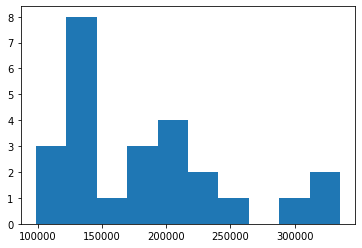

In [11]:
plt.hist(neighborhood_mean_prices)
plt.show()

In [12]:
neighborhoodBins = pd.qcut(neighborhood_mean_prices,3,labels=False)

In [13]:

# This gets a Pandas Series of the neighborhoods by Quartile

neighborhoodBin1 = neighborhood_mean_prices[neighborhoodBins== 0].index 
neighborhoodBin2 = neighborhood_mean_prices[neighborhoodBins== 1].index 
neighborhoodBin3 = neighborhood_mean_prices[neighborhoodBins== 2].index 


In [14]:
# This code takes the Neighborhood Column, and checks if 
# the values are contained

houses_df['NeighborhoodBin1'] = houses_df['Neighborhood'].isin(neighborhoodBin1)
houses_df['NeighborhoodBin2'] = houses_df['Neighborhood'].isin(neighborhoodBin2)
houses_df['NeighborhoodBin3'] = houses_df['Neighborhood'].isin(neighborhoodBin3)

This operation took the cardinality of the previous column, and brought it d

## III. Indicator Features (Flagging)

Another kind of pre-processing is done by creating indicator features. There are a number of reasons why to create indicator features, from flagging outliars, places where null values were filled, as well as samples that meet multiple conditions.

### Flagging Outliars
<hr style="border:2px solid gray"> </hr>

An outliar is a data point which is on the tail end of a normal distribution. Usually, a certain amount of outliars can be explained by a model. If they follow a normal distribution, then it is generally acceptable to clean them from the dataset.

 but if there are large groups of outliars, then it suggests that there is an exogenous factor that isn't explained by the model. 

Flagging outliars can help identify weaknesses in the model so that they can be accounted for in later iterations, and make the model more resilient.



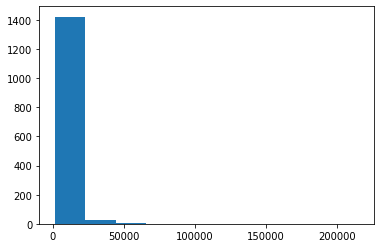

In [15]:
plt.hist(houses_df['LotArea'])
plt.show()

Here, the mean size of a lot is around 10,000 square feet, with 50% of the data being between 7,500 sq feet and 11600 square feet. 


However the max size of a lot is 215,245 feet. This suggests that there is something very distinct about these outliars. Pandas makes it straightforward to identify outliars. There are several ways to identify and handle them based on the situation. But, a standard one is usually using the z-score method.

https://www.kaggle.com/nareshbhat/outlier-the-silent-killer

In [16]:
houses_df['LargeProperty'] = np.where(houses_df['LotArea'] > houses_df['LotArea'].mean() 
                                      + houses_df['LotArea'].std() * 1.5,
                                      True,False) 

### Indicating if a Sample Meets Multiple Conditions
<hr style="border:2px solid gray"> </hr>

This would be a good place to account for more of the data and draw connections that may be useful to the model.

In [17]:
houses_df['BldgType'].value_counts()

1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

In [18]:
houses_df['LowDensityApt'] = np.where((houses_df['BldgType'] != '1Fam') & (houses_df['MSZoning'] == 'RL'),True,False)

This here will control for the apartments which are in low density districts as a category. The key reason that one would do this is to show a model something that you already know. If you already know that a group within the sample is going to have differences from the rest of the population this sort of flagging is a good way to account for that.

## Interaction Features (Calculated Fields)
<hr style="border:2px solid gray"> </hr>

Often, there are relationships between data that should be grouped together, especially when one is restructuring a dataset to a different purpose than previously intended. 

One example would be calculate the price per square foot ratio, since this is a very relevant variable that could have predictive and analytic power.

In [19]:
cont_vars

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageYrBlt',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'MiscVal',
 'SalePrice']

### Calculating a new metric

This can be done by doing mathematical operations by columns.

In [20]:
houses_df['PricePerSF'] = houses_df['SalePrice'] / houses_df['GrLivArea']

## Layer 2: Low Level Data Wrangling
<hr style="border:4px solid gray"> </hr>

Before, we were performing operations at the column level. Now, we'll be going down to the level of manipulating and engineering features. This is where most of the time will be spent processing data before it is cleansed. 

However, this is where the biggest gains are to be made in improving a model's performance because we are accessing data that is otherwise hidden or inaccessible to being transformed into tensors. 

There are many different tools in pandas for handling this problem. It often comes down to the particulars of a certain dataset. However, the principle of indexing and applying is still useful.

As long as one can index the data points which one needs to manipulate, then one can extract them in a way that makes them more meaningful.

This is called masking, because we can get only the data that we need to manipulate.

In [98]:
retail_df = pd.read_csv(DATA_DIR/'retail'/'rfd_main.csv',index_col=0)
comments_df = pd.read_csv(DATA_DIR/'retail'/"rfd_comments.csv",index_col=0)

retail_df.reset_index(inplace=True,drop=True)
comments_df.reset_index(inplace=True,drop=True)

This is a dataset of deals collected on a website. It will take a fair 

In [99]:
retail_df.head()

,author,creation_date,expiry,last_reply,parent_category,price,replies,saving,source,thread_category,title,url,views,votes
0,flora0222,"Jul 16th, 2020 8:29 am",NaN,"Jul 17th, 2020 9:20 am",NaN,6.99,89,NaN,Staples,Home & Garden,"One Step Hand Sanitizer, Fragrance-Free, 473mL...",https://staplescanada.4u8mqw.net/c/341376/7554...,15445,132
1,yellowmp5,"Jul 13th, 2020 1:29 pm",NaN,"Jul 17th, 2020 9:18 am",NaN,NaN,441,NaN,Home Depot,Home & Garden,RYOBI 20% coupon barcode,NaN,59219,159
2,riseagainstthemachine,"Jul 2nd, 2020 10:03 am",NaN,"Jul 17th, 2020 9:17 am",NaN,free,92,NaN,NaN,Apparel,Kits.com Free Pair Prescription Glasses,https://www.kits.com/freeglasses.html,25242,54
3,Googliya,"Jul 17th, 2020 7:23 am",NaN,"Jul 17th, 2020 9:15 am",NaN,469.99,13,NaN,Costco,Sports & Fitness,"Northrock xc00, fat Tire bike, $469.99",https://www.costco.ca/northrock-xc00-fat-tire-...,1769,2
4,Presents,"Jul 16th, 2020 1:36 pm","July 29, 2020","Jul 17th, 2020 9:15 am",NaN,NaN,24,NaN,Canadian Tire,Automotive,60x total CT Money when you pay with your Tria...,NaN,2981,9


### Feature Extraction/Decomposition
<hr style="border:2px solid gray"> </hr>

Features are often hidden inside of text, which unlocks data stored in Excel, Docx, and PDF documents, that can be structured into a pandas dataframe.

### Matching rows that contain a string pattern

It is also possible to apply a mask across multiple rows using pandas. We can index the data we need, and check it for the pattern, then return a true/false value that can be used to perform operations on it.

In [100]:
cols_to_check = ['thread_category','title']
pattern = 'Sport'
mask = retail_df[cols_to_check].apply(
        lambda col:col.str.contains(
        pattern, na=False, case=False)).all(axis=1)

In [101]:
retail_df[mask == True]

,author,creation_date,expiry,last_reply,parent_category,price,replies,saving,source,thread_category,title,url,views,votes
232,Ducky90,"Jun 19th, 2020 2:35 am",NaN,"Jul 16th, 2020 12:03 pm",NaN,699,45,NaN,Walmart,Sports & Fitness,Echelon Connect Sport Spin Bike $699,http://click.linksynergy.com/deeplink?id=CAqD7...,16310,11
337,ragin_pyro,"Jul 6th, 2020 10:59 pm","July 13, 2020","Jul 14th, 2020 11:48 pm",NaN,NaN,172,10-25% off,Sport Chek,Sports & Fitness,Sport Chek and Atmosphere: Friends and Family ...,http://www.pjatr.com/t/8-8297-58025-56718?url=...,51180,43
1029,Stanislas,"Jul 1st, 2020 8:19 am",NaN,"Jul 1st, 2020 1:08 pm",NaN,NaN,7,40% off,NaN,Sports & Fitness,Sportium (store closing) Maui Jim,https://www.sportium.ca/fr/shop?q=Maui+jim,2463,2


### Removing Formatting 

In [102]:
comments_df['comments'] = comments_df['comments'].str.replace(r"\\n+"," ")

<ipython-input-102-0f97437cc332>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  comments_df['comments'] = comments_df['comments'].str.replace(r"\\n+"," ")


### Removing Miscellaneous Characters

From time to time, when dealing with large amounts of data, you may come across strange characters that throw an error. In this case, you can copy the character from the error message, and then use the **.str.replace** method 

In [103]:
comments_df['comments'] = comments_df['comments'].str.replace("↑+","")


<ipython-input-103-93e14d1339c6>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  comments_df['comments'] = comments_df['comments'].str.replace("↑+","")


### Removing URLs

In raw data, you can also come across URLs, email address, and other HTML tags. Luckily, since these are meant to be read by a computer, they usually follow a very regular pattern that can be found using pandas .str methods with a regex pattern. These can often be found online with an internet search.

In [104]:
comments_df['comments'] = comments_df['comments'].str.replace(r"\bhttp.+"," ")

<ipython-input-104-373ed1d19d1d>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  comments_df['comments'] = comments_df['comments'].str.replace(r"\bhttp.+"," ")


### Converting String to Datetime

The first step here is identifying a pattern. 

Here, it would be a good idea to remove the human readable ordinal number formatting with the 1st, 2nd,2rd, 4th because it will simply the next step of having a regular pattern to extract the datetime. 

In [105]:
retail_df['creation_date'].sample(3)

399       Jul 8th, 2020 1:31 pm
961     Jun 23rd, 2020 11:11 am
1142     Jun 29th, 2020 7:32 am
Name: creation_date, dtype: object

In [106]:
retail_df['creation_date'] = retail_df['creation_date'].str.replace('st|nd|rd|th','')
retail_df['last_reply'] = retail_df['last_reply'].str.replace('st|nd|rd|th','')

retail_df['expiry'] = retail_df['expiry'].str.replace('st|nd|rd|th','')


<ipython-input-106-637a6489eb76>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  retail_df['creation_date'] = retail_df['creation_date'].str.replace('st|nd|rd|th','')
<ipython-input-106-637a6489eb76>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  retail_df['last_reply'] = retail_df['last_reply'].str.replace('st|nd|rd|th','')
<ipython-input-106-637a6489eb76>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  retail_df['expiry'] = retail_df['expiry'].str.replace('st|nd|rd|th','')


Here, there are codes which can be used to convert the pattern into a datetime datatype which has computational meaning to it.

<table>
<tbody>
<tr>
<td><strong>Format Code</strong></td>
<td><strong>Description</strong></td>
<td><strong>Examples</strong></td>
</tr>
<tr>
<td>%a</td>
<td>Weekday, abbreviated</td>
<td>Mon, Tues, Sat</td>
</tr>
<tr>
<td>%A</td>
<td>Weekday, full name</td>
<td>Monday, Tuesday, Saturday</td>
</tr>
<tr>
<td>%w</td>
<td>Weekday, decimal. 0=Sunday</td>
<td>1, 2, 6</td>
</tr>
<tr>
<td>%d</td>
<td>Day of month, zero-padded</td>
<td>01, 02, 21</td>
</tr>
<tr>
<td>%b</td>
<td>Month, abbreviated</td>
<td>Jan, Feb, Sep</td>
</tr>
<tr>
<td>%B</td>
<td>Month, full name</td>
<td>January, February, September</td>
</tr>
<tr>
<td>%m</td>
<td>Month number, zero-padded</td>
<td>01, 02, 09</td>
</tr>
<tr>
<td>%y</td>
<td>Year, without century, zero-padded</td>
<td>02, 95, 99</td>
</tr>
<tr>
<td>%Y</td>
<td>Year, with century</td>
<td>1990, 2020</td>
</tr>
<tr>
<td>%H</td>
<td>Hour (24 hour), zero padded</td>
<td>01, 22</td>
</tr>
<tr>
<td>%I</td>
<td>Hour (12 hour) zero padded</td>
<td>01, 12</td>
</tr>
<tr>
<td>%p</td>
<td>AM or PM</td>
<td>AM, PM</td>
</tr>
<tr>
<td>%M</td>
<td>Minute, zero-padded</td>
<td>01, 02, 43</td>
</tr>
<tr>
<td>%S</td>
<td>Second, zero padded</td>
<td>01, 32, 59</td>
</tr>
<tr>
<td>%f</td>
<td>Microsecond, zero-padded</td>
<td>000001, 000342, 999999</td>
</tr>
<tr>
<td>%z</td>
<td>UTC offset ±HHMM[SS[.ffffff]]</td>
<td>+0000, -1030, -3423.234</td>
</tr>
<tr>
<td>%Z</td>
<td>Time zone name</td>
<td>ITC, EST, CST</td>
</tr>
<tr>
<td>%j</td>
<td>Day of year, zero-padded</td>
<td>001, 365, 023</td>
</tr>
<tr>
<td>%U</td>
<td>Week # of year, zero-padded. Sunday first day of week</td>
<td>00, 01, 51</td>
</tr>
<tr>
<td>%W</td>
<td>Week # of year, zero-padded. Monday first day of week</td>
<td>00, 02, 51</td>
</tr>
<tr>
<td>%c</td>
<td>Appropriate date and time</td>
<td>Monday Feb 01 21:30:00 1990</td>
</tr>
<tr>
<td>%x</td>
<td>Appropriate Date</td>
<td>02/01/90</td>
</tr>
<tr>
<td>%X</td>
<td>Appropriate Time</td>
<td>21:22:00</td>
</tr>
<tr>
<td>%%</td>
<td>Literal <code>'%'</code> – Use this when you have a % sign in your format.</td>
<td>%</td>
</tr>
</tbody>
</table>

Source: https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/

In [107]:
retail_df['creation_date'] = pd.to_datetime(retail_df['creation_date'],
                                            format="%b %d, %Y %I:%M %p")
                                # This is the pattern made for this dataset

retail_df['last_reply'] = pd.to_datetime(retail_df['last_reply'],
                                            format="%b %d, %Y %I:%M %p")


Sometimes when converting datetime data, you may come across differences in formating and typos. In this, you can replace it as something which the pd.to_datetime method will accept.

In [108]:
retail_df['expiry'] =retail_df['expiry'].str.replace('Augu','August')


In [109]:

retail_df['expiry'] = pd.to_datetime(retail_df['expiry'],
                                            format="%B %d, %Y")

In [110]:
retail_df['expiry'].sample(5)

696    2020-07-12
812           NaT
327           NaT
1017          NaT
721           NaT
Name: expiry, dtype: datetime64[ns]

### Extracting Information from Long Text Strings

In raw data, sometimes we may need to go into long strings to look for information that isn't well structured enough to call it using a normal method. In this, there is information about the retailer which is contained in the title of the web page. 

Using a combination of regular expressions and shrewed indexing, one can peak into even the most unstructured of data to extract data. 

In [111]:
# Step 1: Get a list of values to check against
retailers = pd.Series(retail_df['source'].unique())

In [112]:
# Get an index of the missing values

missingSourcesIndex = retail_df['source'].isna()

missing_sources_df = retail_df[missingSourcesIndex]

In [113]:
# Create a regular expression of all the values a retailer can be
supplierRegex = retailers.str.cat(sep='|')
supplierRegex[:40]

'Staples|Home Depot|Costco|Canadian Tire|'

In [114]:
found_retailers = missing_sources_df[missing_sources_df['title'].str.contains(supplierRegex) == True].copy()

In [115]:
# This group goes through the found values
# In this case, it is easier to handle 
# this in a for loop, rather than
# create lists inside of a pandas.Series
import re 
found = []

for title in found_retailers['title']:
    label = re.search(supplierRegex , title)
    found.append(label[0])

In [116]:
found_retailers['source'] = found

In [118]:
retail_df['source'].iloc[found_retailers.index] = found_retailers['source']

/home/jentlejames/anaconda3/envs/unpackAIdev/lib/python3.8/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Checking to see if the values got replaced

In [119]:
retail_df.iloc[found_retailers.index]

,author,creation_date,expiry,last_reply,parent_category,price,replies,saving,source,thread_category,title,url,views,votes
12,shaibal,2020-06-27 20:39:00,2020-07-02,2020-07-17 09:11:00,Computers & Electronics,1998,28,600 off,Samsung,Televisions,"[Visions] Samsung 65"" Q80T (2020) QLED at $1998",https://www.visions.ca/product-detail/55540/sa...,7974,4
73,maverikbc,2020-07-08 21:31:00,NaT,2020-07-17 02:41:00,Financial Services,NaN,92,NaN,BMO,Credit Cards,"TD, BMO, CIBC and Manulife cash back 10% cards...",NaN,23616,22
77,Teletran,2020-07-04 12:49:00,NaT,2020-07-17 01:53:00,Computers & Electronics,99.96,120,NaN,Walmart,Video Games,Ring Fit Adventure $99.96 @ Walmart Dixie and ...,http://click.linksynergy.com/deeplink?id=CAqD7...,34201,21
83,brobinsoncc,2019-08-23 00:26:00,NaT,2020-07-17 00:57:00,Computers & Electronics,3298,2791,NaN,Costco,Televisions,"(Visions, Costco, BB, 2001) LG OLED 65C9 $3298...",https://www.visions.ca/product-detail/49756/lg...,507393,63
133,aasoror,2018-07-14 00:00:00,NaT,2020-07-16 20:03:00,Computers & Electronics,NaN,1205,NaN,Staples,Peripherals & Accessories,[Staples/TheSource/WM/BB/Costco] HP Inkjet wir...,https://staplescanada.4u8mqw.net/c/341376/7554...,355278,116
148,Blubbs,2020-07-03 12:21:00,NaT,2020-07-16 19:11:00,Computers & Electronics,NaN,120,NaN,Samsung,Cell Phones,"Samsung Galaxy S10 Lite (6.7"", 128GB, 8GB, SD8...",https://www.bhphotovideo.com/c/product/1568604...,28281,26
254,EasyCompany251,2020-07-11 22:11:00,NaT,2020-07-16 11:33:00,NaN,20,24,NaN,Maxi,Automotive,Maximum Impact Socket Set 10 Piece - $20,https://www.canadiantire.ca/en/pdp/maximum-imp...,8765,0
269,Menthos12,2020-07-16 00:00:00,NaT,2020-07-16 00:35:00,Computers & Electronics,64.99,1,NaN,Nintendo,Video Games,Nintendo Themed SanDisk 256GB MicroSDXC - 64.9...,http://www.amazon.ca/gp/redirect.html?ie=UTF8&...,1729,0
445,spyhero,2020-07-13 14:39:00,2020-07-23,2020-07-13 16:20:00,NaN,$215.99,4,NaN,Dell,Computers & Electronics,"Dell P2419H 24"" Monitor $215.99",http://www.dpbolvw.net/click-749547-12105225?u...,1401,1
447,Arcticsilverfox,2020-06-12 12:49:00,NaT,2020-07-13 16:03:00,Computers & Electronics,59.99,78,NaN,Rogers,Telecom,[MARKHAM ONLY] 500Mbit/20Mbit Cable Internet (...,NaN,12641,-9
